<a href="https://colab.research.google.com/github/AbR04/6thSem-ML-Lab/blob/main/1BM22CS005_Lab_8_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy Score: 0.7263
Confusion Matrix:
[[  6   0  37]
 [  0   6  11]
 [  0   1 118]]


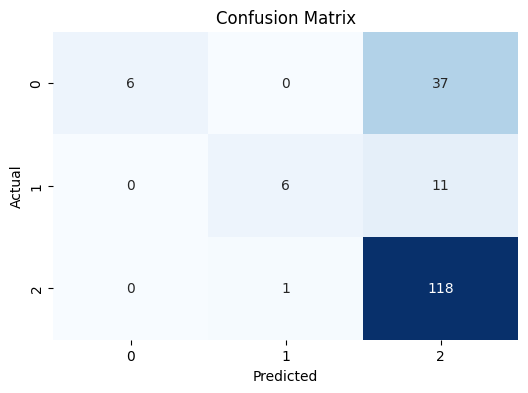

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('train.csv')

# Separate features and target (Assume last column is target)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Encode categorical features in X
X = pd.get_dummies(X)

# Encode the target if it's categorical
if y.dtype == 'object' or y.dtype.name == 'category':
    y = LabelEncoder().fit_transform(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy Score: {acc:.4f}")
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
# Create a pandas DataFrame for better visualization (optional)
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Split the data into training and testing sets
# Use random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Model with default n_estimators=10 ---
# Note: As of scikit-learn 0.22, the default value for n_estimators changed from 10 to 100.
# We will explicitly set it to 10 as requested.
rf_default = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the model
rf_default.fit(X_train, y_train)

# Make predictions
y_pred_default = rf_default.predict(X_test)

# Evaluate the model
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Accuracy with default n_estimators=10: {accuracy_default:.4f}")

# --- Fine-tuning n_estimators ---
best_score = 0
best_n_estimators = 0
estimator_values = [10, 50, 100, 150, 200] # Values to test for n_estimators

print("\nFine-tuning n_estimators:")
for n in estimator_values:
    # Initialize RandomForestClassifier with current n_estimators
    rf_tuned = RandomForestClassifier(n_estimators=n, random_state=42)

    # Train the model
    rf_tuned.fit(X_train, y_train)

    # Make predictions
    y_pred_tuned = rf_tuned.predict(X_test)

    # Evaluate the model
    accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
    print(f"  n_estimators={n}, Accuracy: {accuracy_tuned:.4f}")

    # Check if this score is the best so far
    if accuracy_tuned > best_score:
        best_score = accuracy_tuned
        best_n_estimators = n

# Print the best result
print(f"\nBest score achieved: {best_score:.4f} with n_estimators={best_n_estimators}")

Accuracy with default n_estimators=10: 1.0000

Fine-tuning n_estimators:
  n_estimators=10, Accuracy: 1.0000
  n_estimators=50, Accuracy: 1.0000
  n_estimators=100, Accuracy: 1.0000
  n_estimators=150, Accuracy: 1.0000
  n_estimators=200, Accuracy: 1.0000

Best score achieved: 1.0000 with n_estimators=10
